# NETWORK

In [2]:
%matplotlib inline
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
raw_data = pd.read_csv('Full-2020_05_10-13_14_09-X_raw_disease_50_target_100_7217_by_101.csv')
raw_data.head()

,Unnamed: 0,ENSG00000025039,ENSG00000048649,ENSG00000079459,ENSG00000102096,ENSG00000102580,ENSG00000103522,ENSG00000117151,ENSG00000117399,ENSG00000122786,...,ENSG00000279454,ENSG00000279774,ENSG00000279861,ENSG00000283202,ENSG00000284416,ENSG00000287234,ENSG00000287291,ENSG00000287329,ENSG00000287565,COVID
0,EFO_0000209,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001827
1,EFO_0000537,0.0,0.0,0.014,0.0,0.0,0.0,0.022289,0.006,0.064156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001435
2,EFO_0000760,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000,0.022000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002511
3,EFO_0005109,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003721
4,EFO_0005194,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201


In [139]:
disease_list = list(raw_data['Unnamed: 0'])
gene_list = list(raw_data.columns)[1:]

In [203]:
df_diseases_names = pd.read_csv('disease_list.csv')
d_codes = list(df_diseases_names.efo_id)
d_names = list(df_diseases_names.disease_full_name)
diseases_names = {d_codes[i]:d_names[i] for i in range(len(d_codes)) }

FileNotFoundError: [Errno 2] File b'disease_list.csv' does not exist: b'disease_list.csv'

In [164]:
data = []
for i in range(len(raw_data)):
    disease = raw_data.iloc[i]
    disease_name = diseases_names[disease['Unnamed: 0']]
    edges = [(disease_name, gene, disease[gene]) for gene in gene_list if disease[gene] != 0]
    if len(edges) > 0:
        data.extend(edges)

In [165]:
# read edgelist from the txt file
Graph = nx.Graph()
diseases = np.unique([data[i][0] for i in range(len(data))])
genes = np.unique([data[i][1] for i in range(len(data))])
Graph.add_nodes_from(diseases, label = 'Disease')
Graph.add_nodes_from(genes, label = 'Gene')
Graph.add_weighted_edges_from(data)

In [166]:
nodelist = {}
nodelist['Diseases'] = diseases
nodelist['Genes'] = genes

In [167]:
print(type(Graph))

<class 'networkx.classes.graph.Graph'>


In [168]:
print('Number of nodes: {}'.format(len(Graph.nodes)))
print('Number of edges: {}'.format(len(Graph.edges)))

Number of nodes: 7265
Number of edges: 20541


In [169]:
# infos dict initialization
Graph_infos = {}

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Min degree connection: 1

Max degree connection: 7217

Median degree connection: 1.0

Mean degree connection: 5.654783207157605

75% quantile degree connection: 3.0

25% quantile degree connection: 1.0



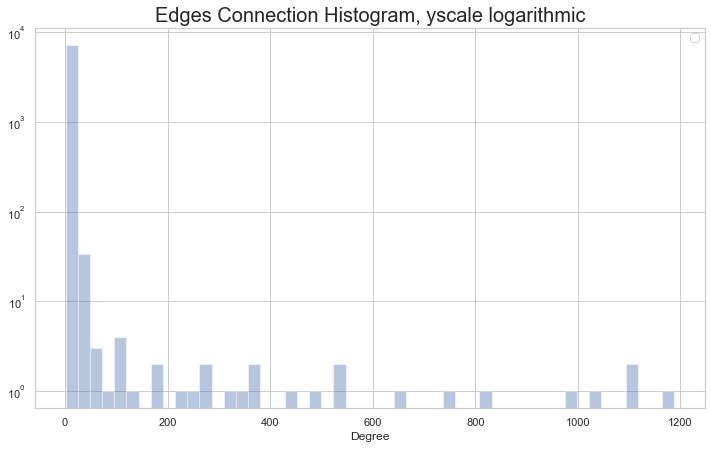

In [170]:
# Degree (number of edges at each node) for all nodes in order to have the main stats (max,min,meand,median,quantile) and plot

Graph_infos['Degrees'] = dict(nx.degree(Graph))

# only values
degrees_val = [Graph_infos['Degrees'][node] for node in Graph_infos['Degrees']]

#stats
degree_min = np.min(degrees_val)
print('Min degree connection: {}'.format(degree_min))
print('')

degree_max = np.max(degrees_val)
print('Max degree connection: {}'.format(degree_max))
print('')

degree_median = np.median(degrees_val)
print('Median degree connection: {}'.format(degree_median))
print('')

degree_mean = np.mean(degrees_val)
print('Mean degree connection: {}'.format(degree_mean))
print('')

degree_u_quant = np.quantile(degrees_val,0.75)
print('75% quantile degree connection: {}'.format(degree_u_quant))
print('')

degree_l_quant = np.quantile(degrees_val,0.25)
print('25% quantile degree connection: {}'.format(degree_l_quant))
print('')

# remove covid for histogram
degrees_val.remove(np.max(degrees_val))

# Degree histogram
plt.figure(figsize=(12,7)) 
sns.set(style = "whitegrid") 
 
sns.distplot(degrees_val,axlabel="Degree",kde=False)


plt.legend()
plt.yscale('log')
plt.title("Edges Connection Histogram, yscale logarithmic", fontsize = 20) # for histogram title
plt.legend()

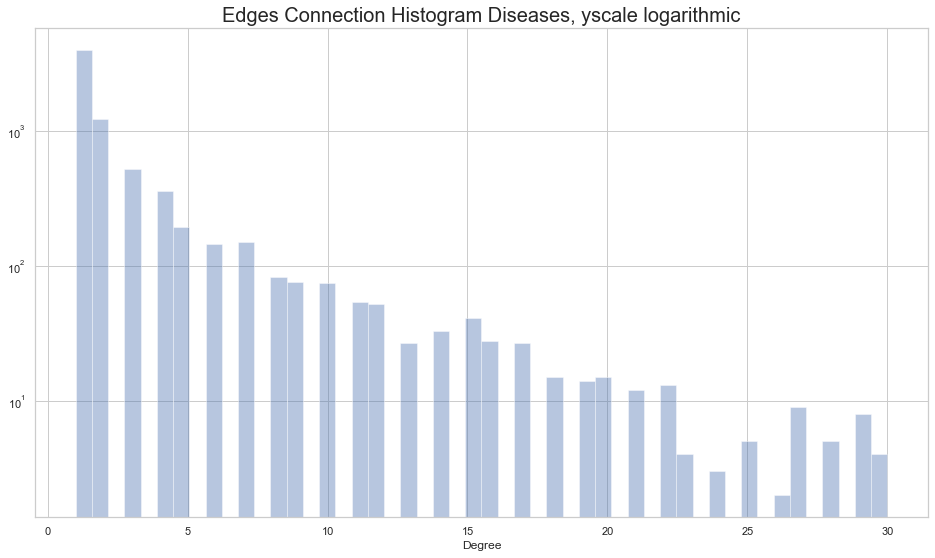

In [171]:
# Degree histogram Diseases
degrees_val_disease = [Graph_infos['Degrees'][d] for d in diseases]

# remove covid for histogram
degrees_val_disease.remove(np.max(degrees_val_disease))

plt.figure(figsize=(16,9)) 
sns.set(style = "whitegrid") 
 
sns.distplot(degrees_val_disease,axlabel="Degree",kde=False)

plt.yscale('log')
plt.title("Edges Connection Histogram Diseases, yscale logarithmic", fontsize = 20) # for histogram title
plt.show()

7217


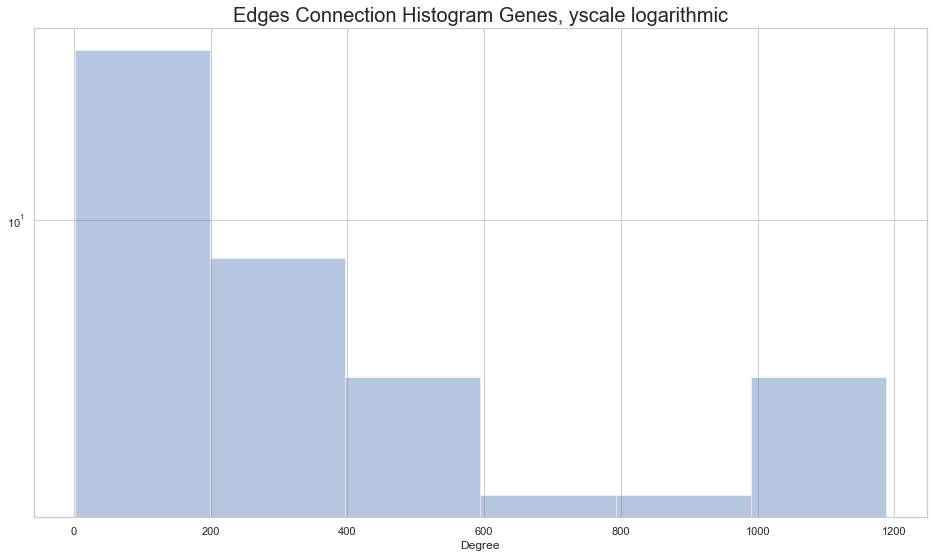

In [172]:
# Degree histogram Genes
degrees_val_genes = [Graph_infos['Degrees'][g] for g in genes]
print(max(degrees_val_genes))

# remove covid for histogram
degrees_val_genes.remove(np.max(degrees_val_genes))

plt.figure(figsize=(16,9)) 
sns.set(style = "whitegrid") 
 
sns.distplot(degrees_val_genes,axlabel="Degree",kde=False)

plt.yscale('log')
plt.title("Edges Connection Histogram Genes, yscale logarithmic", fontsize = 20) # for histogram title
plt.show()

In [173]:
Graph_centrality = {}


### Weighted centralities
Graph_centrality = {}

deg_cen = dict(Graph.degree(Graph, weight = 'weight'))
Graph_centrality['Degree Centrality'] = deg_cen

clo_cen = nx.closeness_centrality(Graph)
Graph_centrality['Closeness Centrality'] = clo_cen

bw_cen = nx.betweenness_centrality(Graph, weight = 'weight')
Graph_centrality['Betweeness Centrality'] = bw_cen

pr_cen = nx.pagerank(Graph, weight = 'weight')
Graph_centrality['Pagerank Centrality'] = pr_cen

#eig_cen = nx.eigenvector_centrality(Graph, weight = 'weight')
#Graph_centrality['Eigenvector Centrality'] = eig_cen

df_cen = pd.DataFrame.from_dict(Graph_centrality)

pd.DataFrame.to_csv(df_cen,'Centralities_weighted.csv')

In [174]:
centralities_w = pd.read_csv('Centralities_weighted.csv')
centralities_w_dict = centralities_w.to_dict('series')

In [175]:
centrality_w_names = list(centralities_w.columns)[1:]
disease_codes = list(centralities_w['Unnamed: 0'])

In [176]:
Graph_centrality_w = {}
for col in centrality_w_names:
    Graph_centrality_w[col] = {disease_codes[i]: centralities_w_dict[col][i] for i in range(len(disease_codes))}

In [177]:
# in order to sort dicitonaries
import operator

In [178]:
#list to dict function
def list_to_dict(a):
    d = {a[j][0]:a[j][1] for j in range(len(a)) }

    return d

In [188]:
# print top 10 nodes for given centrality measure
def top_print(name,centrality,n, nodelist, label):
    
    # sort the centrality to have the best above
    centrality_label = {n: centrality[n] for n in nodelist}
    ranked_list = sorted(centrality_label.items(),key = operator.itemgetter(1),reverse = True)
    ranked_dict = list_to_dict(ranked_list)
    print('-------------------------------------------')
    print("{}: WEIGHTED CENTRALITY MEASURE BY {}".format(label.upper(), name.upper()))
    print(' ')
    for k in range(0,n):
        # depends for decimals or not
        if ranked_list[k][1] > 1:
            print("{}. {}: {:.0F}".format(k+1,ranked_list[k][0].upper(),ranked_list[k][1]))
        else:
            print("{}. {}: {:.5F}".format(k+1,ranked_list[k][0].upper(),ranked_list[k][1]))
        k = k+1
    

In [194]:
#execute function
for k in Graph_centrality_w:
    centrality = Graph_centrality_w[k]
    name = k
    top_print(name,centrality,10,list(diseases), 'Disease' )

-------------------------------------------
DISEASE: WEIGHTED CENTRALITY MEASURE BY DEGREE CENTRALITY
 
1. MEASUREMENT: 14
2. GENETIC DISORDER: 13
3. GENETIC, FAMILIAL OR CONGENITAL DISEASE: 13
4. CELL PROLIFERATION DISORDER: 12
5. NEOPLASTIC DISEASE OR SYNDROME: 12
6. NEOPLASM: 12
7. CANCER: 12
8. RESPIRATORY OR THORACIC DISEASE: 11
9. THORACIC DISEASE: 11
10. EPITHELIAL NEOPLASM: 10
-------------------------------------------
DISEASE: WEIGHTED CENTRALITY MEASURE BY CLOSENESS CENTRALITY
 
1. MEASUREMENT: 0.50055
2. CELL PROLIFERATION DISORDER: 0.50041
3. NEOPLASM: 0.50041
4. NEOPLASTIC DISEASE OR SYNDROME: 0.50041
5. NERVOUS SYSTEM DISEASE: 0.50041
6. BONE DISEASE: 0.50034
7. BRAIN DISEASE: 0.50034
8. CENTRAL NERVOUS SYSTEM DISEASE: 0.50034
9. CONNECTIVE TISSUE DISEASE: 0.50034
10. HEMATOLOGICAL MEASUREMENT: 0.50034
-------------------------------------------
DISEASE: WEIGHTED CENTRALITY MEASURE BY BETWEENESS CENTRALITY
 
1. UTERINE DISEASE: 0.04301
2. PARALYSIS: 0.02283
3. SHORT STAT

In [201]:
#execute function
for k in Graph_centrality_w:
    centrality = Graph_centrality_w[k]
    name = k
    top_print(name,centrality,10,list(genes), 'Genes' )

-------------------------------------------
GENES: WEIGHTED CENTRALITY MEASURE BY DEGREE CENTRALITY
 
1. ENSG00000169432: 668
2. ENSG00000103522: 315
3. ENSG00000187735: 208
4. ENSG00000165646: 207
5. ENSG00000213398: 173
6. ENSG00000170962: 144
7. ENSG00000122786: 134
8. ENSG00000102580: 97
9. ENSG00000204977: 78
10. ENSG00000117399: 71
-------------------------------------------
GENES: WEIGHTED CENTRALITY MEASURE BY CLOSENESS CENTRALITY
 
1. COVID: 0.99357
2. ENSG00000213398: 0.37472
3. ENSG00000169432: 0.37166
4. ENSG00000122786: 0.37150
5. ENSG00000165646: 0.36924
6. ENSG00000103522: 0.36737
7. ENSG00000170962: 0.36112
8. ENSG00000079459: 0.35859
9. ENSG00000278535: 0.35568
10. ENSG00000117399: 0.35114
-------------------------------------------
GENES: WEIGHTED CENTRALITY MEASURE BY BETWEENESS CENTRALITY
 
1. COVID: 0.99939
2. ENSG00000079459: 0.04311
3. ENSG00000170962: 0.02273
4. ENSG00000168734: 0.00275
5. ENSG00000141756: 0.00275
6. ENSG00000213398: 0.00111
7. ENSG00000165646: 

In [117]:
def overall_ranking(G, G_centrality, n_top, G_infos, disease_names):
    ''' G: Graph
        G_centrality: centralities dict 
        n_top (int): number of nodes to be printed
        G_infos (dict)'''
    
    centralities = list(G_centrality.keys())
    
    # dict in order to have the ranking {best node 1: 1, best node 2: 2} for each centrality
    centrality_ranked = {}
    
    # for each key in the overall_rank dict, have the ranking they have in each centrality
    overall_rank = {n: [] for n in G.nodes}

    for cen in centralities:

        ranking = sorted(G_centrality[cen].items(),key = operator.itemgetter(1),reverse = True)
        
        centrality_ranked[cen] = {ranking[n][0]: n+1 for n in range(0,len(ranking))}
        
        for node in G.nodes:
            overall_rank[node].append(centrality_ranked[cen][node])
        
    # sum the points each nodes earned in the ranking in the centralities
    total = {node: np.sum(overall_rank[node]) for node in G.nodes}
    
    # sort in order to have the n_tops nodes in increasing order
    total_ranking = sorted(total.items(),key = operator.itemgetter(1),reverse = False)
    
    top_nodes = [total_ranking[i][0] for i in range(n_top)]
    
    print('OVERALL RANKING')

        
    for i in range(len(top_nodes)):
        node = top_nodes[i]
        print('')
        print('------------------')
        print('Node: {}'.format(disease_names[node].upper()))
        print('')
        print('No: {} in centrality overall ranking'.format(i+1))
        print('')
        print('Specificity:')
        print('')
        print('Number of connections: {}'.format(G_infos['Degrees'][node]))
        print('Number of triangles involved in: {}'.format(G_infos['Triangles'][node]))
        
        print('')
        for j in range(len(centralities)):
            print('No: {} in {} ranking'.format(overall_rank[node][j], str(centralities[j])))
        print
        
    return centrality_ranked, total_ranking

In [122]:
centrality_ranked,total_ranking = overall_ranking(Graph, Graph_centrality,10, Graph_infos, diseases_names_dict)

OVERALL RANKING

------------------
Node: POLYP

No: 1 in centrality overall ranking

Specificity:

Number of connections: 706
Number of triangles involved in: 44343

No: 4 in Degree Centrality ranking
No: 13 in Closeness Centrality ranking
No: 51 in Betweeness Centrality ranking
No: 35 in Pagerank Centrality ranking
No: 1 in Eigenvector Centrality ranking

------------------
Node: PREECLAMPSIA

No: 2 in centrality overall ranking

Specificity:

Number of connections: 639
Number of triangles involved in: 39584

No: 9 in Degree Centrality ranking
No: 22 in Closeness Centrality ranking
No: 46 in Betweeness Centrality ranking
No: 37 in Pagerank Centrality ranking
No: 10 in Eigenvector Centrality ranking

------------------
Node: HYPERPLASIA

No: 3 in centrality overall ranking

Specificity:

Number of connections: 686
Number of triangles involved in: 38196

No: 5 in Degree Centrality ranking
No: 35 in Closeness Centrality ranking
No: 56 in Betweeness Centrality ranking
No: 34 in Pagerank 

In [120]:
def draw_graph_top(G,centrality_ranked,n, layout, name, diseases_names):
    
    plt.figure(figsize=(15,15))
    GCCs = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    GCC = GCCs[0]
    
    # draw base etwork 
    nx.draw_networkx(GCC, pos = layout, node_size = 30, with_labels = False, node_color = 'grey', edge_color = '0.7')
    
    # add bigger nodes in color
    
    top_nodes = list(centrality_ranked.keys())[:n]
    labels = {i: diseases_names[i] for i in top_nodes}
    colors = ['#1ECD3F', '#0C437E', '#30F77B', '#E0016D', '#E0C6F4', '#A402CF', '#6C5020', '#014F05', '#3636DE', '#0E82F6']
    big_size = 3000
    sizes = [big_size/(i+1) for i in range(n)]
        
    nx.draw_networkx_nodes(GCC,pos=layout,nodelist= top_nodes, with_labels = True, node_color=colors, node_size = sizes)
        
    nx.draw_networkx_labels(GCC,layout, labels,font_size=16, font_color = 'white') 
    
    
    plt.title(name, fontsize = 20)
    plt.axis("off")

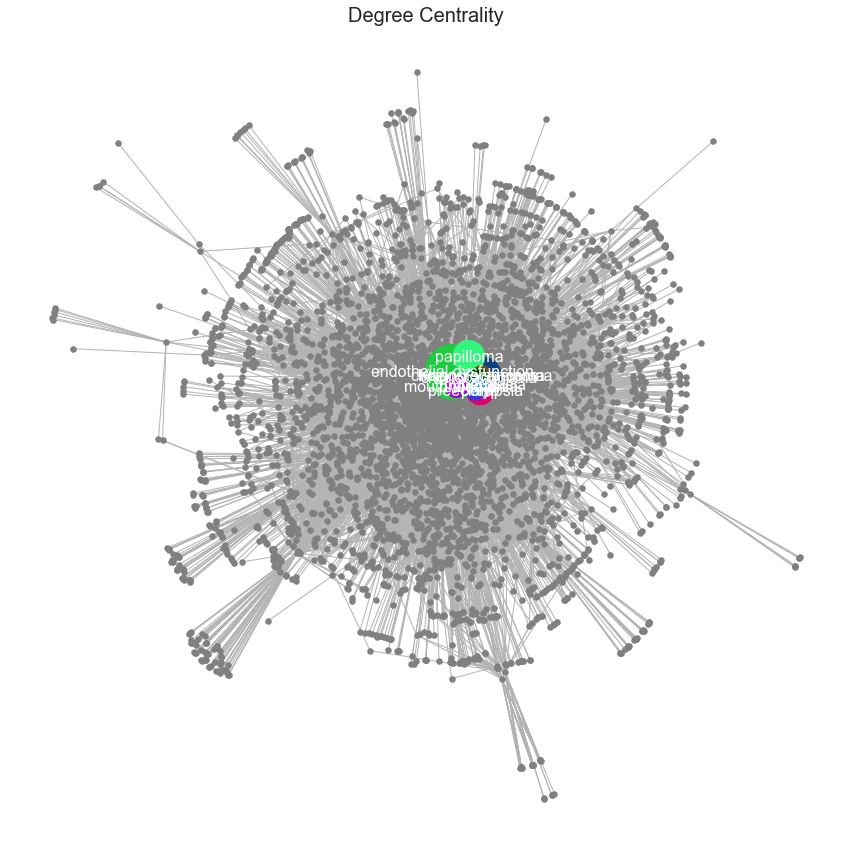

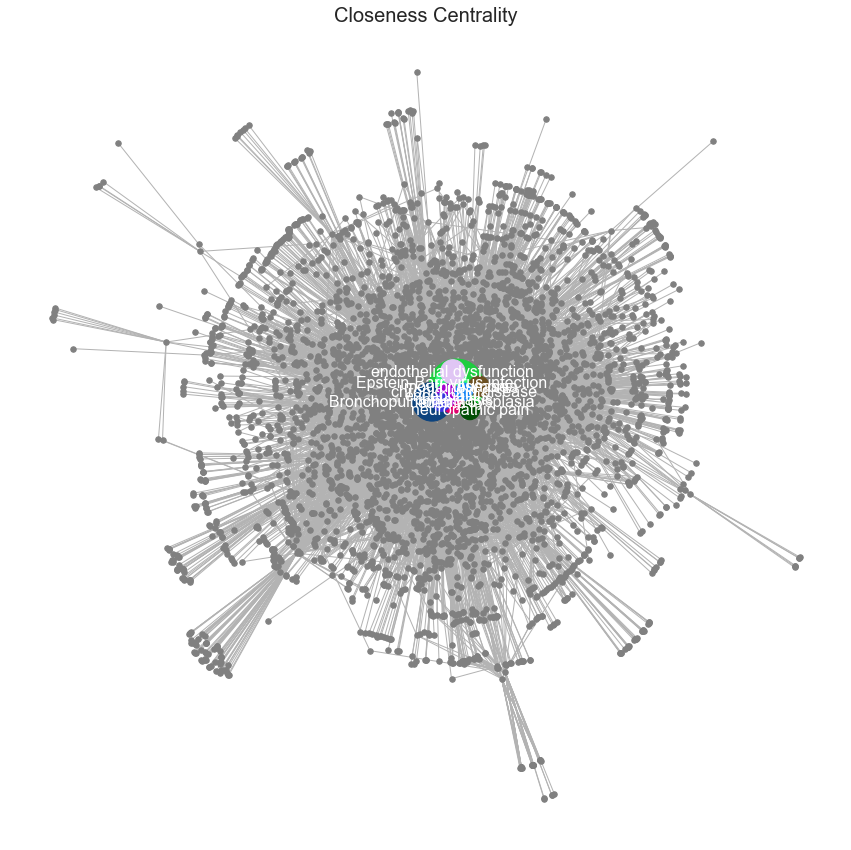

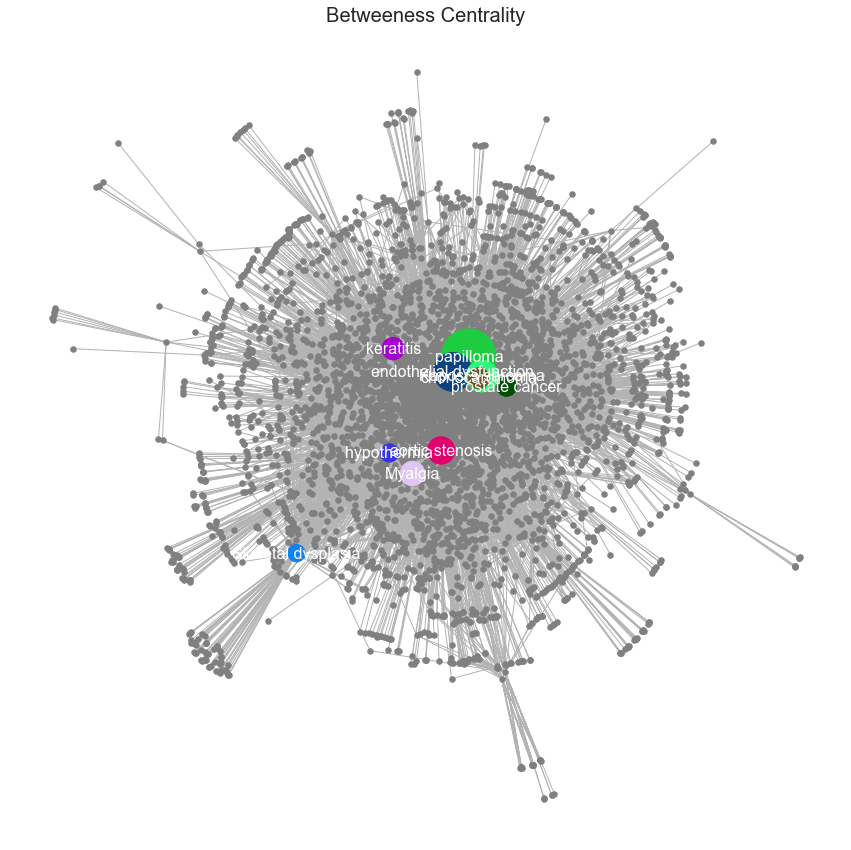

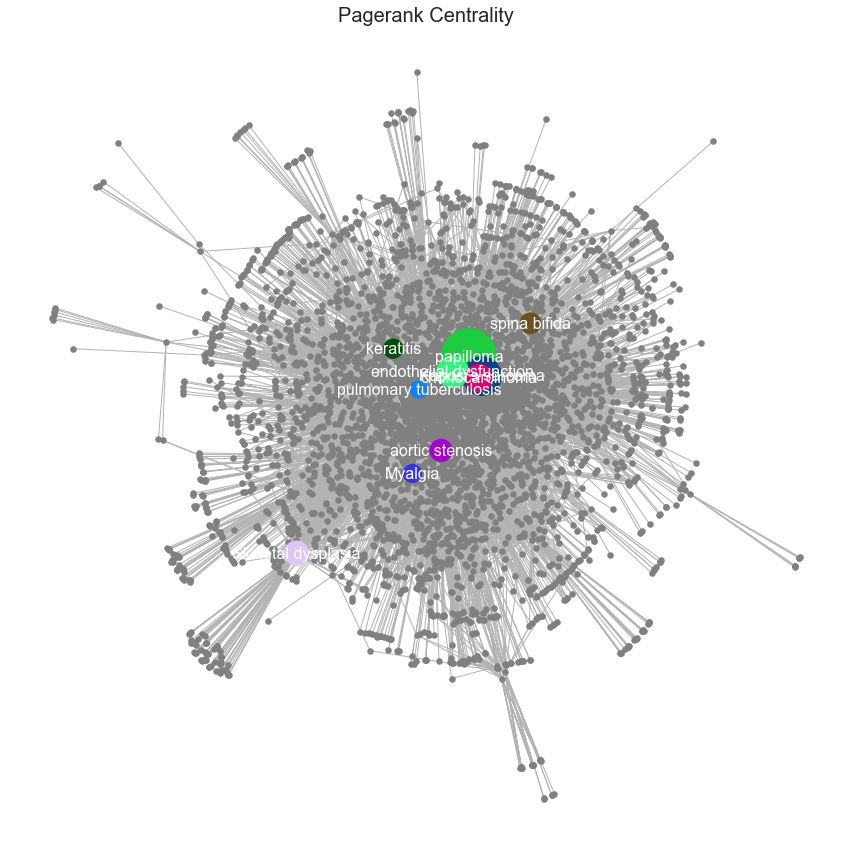

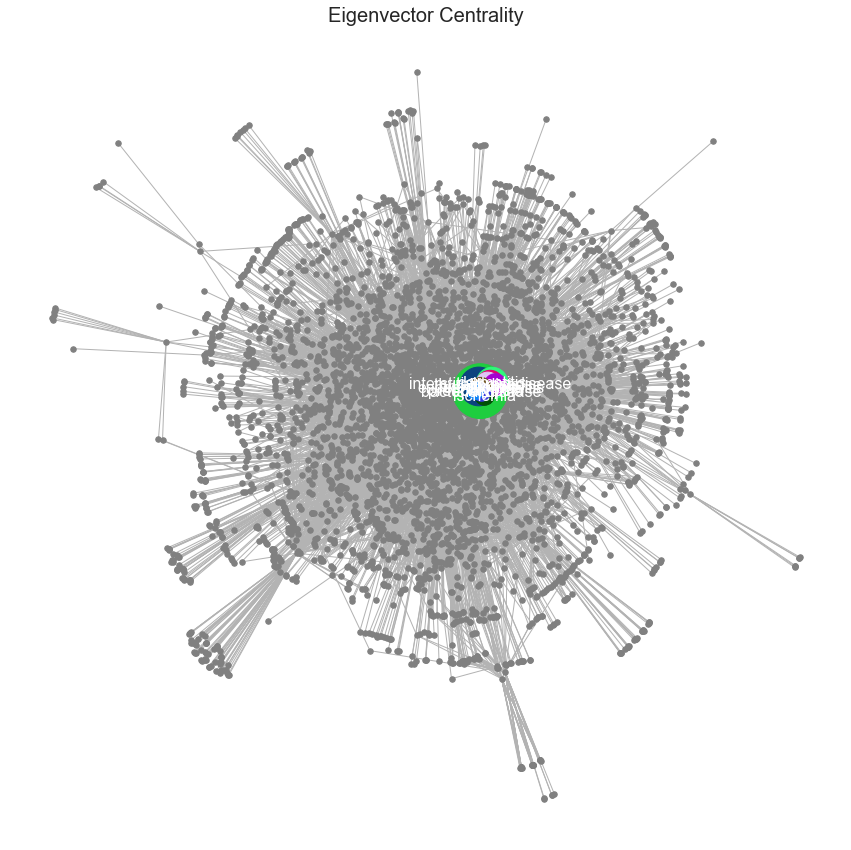

In [123]:
layout = nx.spring_layout(Graph)
for cen in Graph_centrality.keys():
    draw_graph_top(Graph,centrality_ranked[cen],10, layout, str(cen),diseases_names_dict )

   

AttributeError: 'NoneType' object has no attribute 'edges'

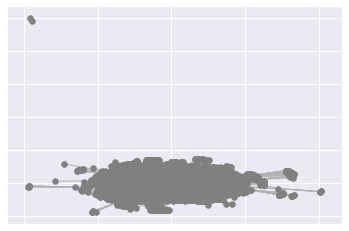

In [29]:
#layout = nx.spring_layout(Graph)

#graph_names = ['Degree.gexf', 'Closeness.gexf', 'Betweeness.gexf', 'Pagerank.gexf', 'Eigenvector.gexf']
#for nm, cen in zip(graph_names, Graph_centrality.keys()):
#    g = nx.draw_networkx(Graph, pos = layout, node_size = 30, with_labels = False, node_color = 'grey', edge_color = '0.7')
#    nx.write_gexf(g, nm)

In [30]:
from networkx.algorithms.community import k_clique_communities
!pip install python-louvain
import community

# apply algorithm
partition = community.best_partition(Graph,randomize=False, random_state=0 )

## dictionnary with all the communities and the nodes they contain

number_of_communities = max(list(partition.values()))
communities_sorted = {}

# let's sort them to have community: list of nodes it contains
for com in range(number_of_communities+1):
    communities_sorted[com] = [n for n in Graph.nodes if partition[n] == com]

# list of tuple with (node, overall ranking(calculated before), community they belong in)
nodes_ranking_community = [(total_ranking[i][0],i+1,partition[total_ranking[i][0]]) for i in range(len(total_ranking))]

In [31]:
community_overall = []

# rank the community overall based on the mean overall ranking of the nodes they contain 
for com in communities_sorted:
    tot = [nodes_ranking_community[i][1] for i in range(len(nodes_ranking_community)) if nodes_ranking_community[i][2] == com]
    community_overall.append((com, np.mean(tot)))
    community_overall.sort(key=lambda tup: tup[1])

In [32]:
# rank with first: 1, second: 2 etc...
community_ranking = {community_overall[i][0]:i+1 for i in range(len(community_overall))}

In [33]:
print('Community Ranking')
print('------------------')
for com in community_ranking:
    print('{}. Community no: {}'.format(community_ranking[com],com))

Community Ranking
------------------
1. Community no: 1
2. Community no: 2
3. Community no: 4
4. Community no: 0
5. Community no: 5
6. Community no: 3
7. Community no: 6
8. Community no: 7


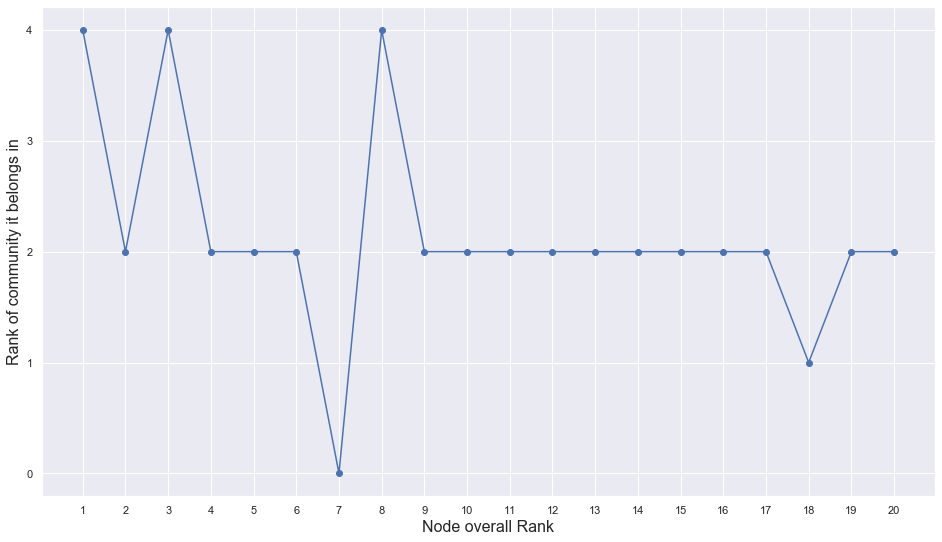

In [34]:
c = [partition[total_ranking[i][0]] for i in range(20)]
labels = [tup[0] for tup in total_ranking][:20]
plt.figure(figsize=(16,9))
plt.scatter(x = range(1,21), y = c, label=labels)
plt.plot(range(1,21),c)
plt.xticks(list(range(1,21)), list(range(1,21)))
plt.xlabel('Node overall Rank', fontsize = 16)
plt.ylabel('Rank of community it belongs in', fontsize = 16)
plt.yticks(list(range(0,max(c)+1)), list(range(0,max(c)+1)))
plt.show()

### Overall ranking including Communities

Now we just add the communites information in the print version of the n_top nodes in overall ranking

In [125]:
def overall_ranking_w_community(G, G_centrality, n_top, G_infos, partition, community_ranking,diseases_names_dict ):
    centralities = list(G_centrality.keys())
    centrality_ranked = {}
    overall_rank = {n: [] for n in G.nodes}

    for cen in centralities:

        ranking = sorted(G_centrality[cen].items(),key = operator.itemgetter(1),reverse = True)
        
        centrality_ranked[cen] = {ranking[n][0]: n+1 for n in range(0,len(ranking))}
        
        for node in G.nodes:
            overall_rank[node].append(centrality_ranked[cen][node])
        
    total = {node: np.sum(overall_rank[node]) for node in G.nodes}
    
    total_ranking = sorted(total.items(),key = operator.itemgetter(1),reverse = False)
    
    top_nodes = [total_ranking[i][0] for i in range(n_top)]
    
    print('OVERALL RANKING')

        
    for i in range(len(top_nodes)):
        node = top_nodes[i]
        print('')
        print('------------------')
        print('Node: {}'.format(diseases_names_dict[node].upper()))
        print('')
        print('No: {} in centrality overall ranking'.format(i+1))
        print('Belongs to community {}, which is {} in community ranking'.format(partition[node],community_ranking[partition[node]]))
        print('')
        
        print('Specificity:')
        print('')
        print('Number of connections: {}'.format(G_infos['Degrees'][node]))
        print('Number of triangles involved in: {}'.format(G_infos['Triangles'][node]))
        
        print('')
        for j in range(len(centralities)):
            print('No: {} in {} ranking'.format(overall_rank[node][j], str(centralities[j])))
        
        
    

In [127]:
overall_ranking_w_community(Graph, Graph_centrality, 10, Graph_infos, partition, community_ranking, diseases_names_dict)

OVERALL RANKING

------------------
Node: POLYP

No: 1 in centrality overall ranking
Belongs to community 4, which is 3 in community ranking

Specificity:

Number of connections: 706
Number of triangles involved in: 44343

No: 4 in Degree Centrality ranking
No: 13 in Closeness Centrality ranking
No: 51 in Betweeness Centrality ranking
No: 35 in Pagerank Centrality ranking
No: 1 in Eigenvector Centrality ranking

------------------
Node: PREECLAMPSIA

No: 2 in centrality overall ranking
Belongs to community 2, which is 2 in community ranking

Specificity:

Number of connections: 639
Number of triangles involved in: 39584

No: 9 in Degree Centrality ranking
No: 22 in Closeness Centrality ranking
No: 46 in Betweeness Centrality ranking
No: 37 in Pagerank Centrality ranking
No: 10 in Eigenvector Centrality ranking

------------------
Node: HYPERPLASIA

No: 3 in centrality overall ranking
Belongs to community 4, which is 3 in community ranking

Specificity:

Number of connections: 686
Numbe